# COGS 108 - Final Project (COVID-19 Cases, Vaccinations, and Athletes in the Tokyo 2020 Olympics)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In this report, we analyze the effects of COVID-19 cases and vaccinations on the 2020 Tokyo Olympics. We made comparisons between the number of athletes each country sent to the 2016 Olympics and the 2020 Olympics and wanted to see if national COVID-19 case numbers and vaccinations were correlated. In the end, we did not see a correlation between COVID-19 and the number of athletes at the Olympics, but we did see that overall, vaccinations did decrease the global rate of Covid infections. 

# Names

- Genevieve Cassidy
- Jenny Vu
- Jessica Gazca
- Rich Liu

<a id='research_question'></a>
# Research Question

How did COVID case numbers and vaccination rates in the 12 month period prior to the Tokyo 2020 Olympics affect how many athletes a country was able to send to the Olympics in 2020 compared to 2016?

<a id='background'></a>

## Background & Prior Work

There have been many analyses surrounding factors that affect a country’s the number of medals a country wins at the Olympics. For example, Jayantha Kalansooriya and E.G. Ubayachandra examined how population, GDP per capita, political systems, and whether or not a country is hosting were related to how many medals countries won at the Sydney 2000 Olympics [1]. They found that countries with higher populations, higher GDP per capita, communist governments, and host countries all tended to win more medals [1]. There have also been predictive models created based on these factors; Andrew Bernard and Meghan Busse created a mathematical model based on per capita GDP to predict how many medals each country would win in the Sydney 2000 Olympics [2].

Though these factors have been studied at length, there is little statistical analysis that examines the way COVID-19 affected performance at the Tokyo 2020 Olympics. Some athletes seemed to thrive through the pandemic, as changing their daily training habits during lockdown helped them reevaluate and try new techniques, which improved their overall performance [3]. Others struggled with mental health, and COVID regulations created major roadblocks for the teams [4]. While it seems that COVID has had mixed effects on the Olympics, we hope to see how COVID case numbers and vaccination affected each team, country by country.

References:
[1] - “Going for Gold Medals: Factors affecting Olympic Performance”
http://www.ijsrp.org/research-paper-0615/ijsrp-p4282.pdf

[2] - “Who Wins the Olympic Games: Economic Resources and Medal Totals”
https://mba.tuck.dartmouth.edu/pages/faculty/andrew.bernard/olymp60restat_finaljournalversion.pdf

[3] - “The Pandemic’s Secret Formula: Backyard Workouts and Lots of Sleep”
https://www.nytimes.com/2020/08/30/sports/olympics/pandemic-olympics-training.html

[4] - “Mixed bag: Erratic Pandemic Olympics come to a nuanced end”
https://apnews.com/article/2020-tokyo-olympics-closing-ceremony-coronavirus-pandemic-2d67aa2775d4ba9716eedd432968ef91

# Hypothesis


We predict that countries that had a higher COVID-19 case numbers proportional to their population sent fewer athletes to the Olympics in 2020 compared to 2016. We also predict that countries that have higher vaccination rates were able to send more athletes to the Olympics compared to countries with lower vaccination rates.

We believe that countries with higher levels of COVID-19 would face more barriers to training, which would make it harder to send athletes to the Olympics. Additionally, countries that have higher vaccination rates generally have a higher GDP, which has already been correlated with a greater number of athletes competing in the Olympics and a greater number of medals won.

# Dataset(s)

**Dataset Name: Tokyo 2020 Olympics**
- Link to the dataset: https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo
- Number of observations: 11085 Rows x 3 Columns  
Description: Includes the name, discipline, and country of every athlete who competed at the Tokyo 2020 Olympics.

**Dataset Name: 2016 Olympics in Rio de Janeiro**
- Link to the dataset: https://www.kaggle.com/rio2016/olympic-games
- Number of observations: 11538 Rows x 11 Columns  
Description: This dataset includes information about each of the athletes that competed in the Rio 2016 Olympics, including name, nationality, sex, birth date, height, weight, sport, and medals won. This dataset also contains the IOC country codes, which are unique three-letter abbreviations for each country.

**Dataset Name:Confirmed COVID Cases Global Time Series**
- Link to the dataset: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
- Number of observations: 280 rows x 630 columns  
Description: The number of confirmed COVID-19 cases reported daily by each country from 1/22/20 to present. The data is cumulative, so each observation shows the number of cases a country has had in total over the course of the pandemic for each day. 

**Dataset Name:Global COVID-19 Vaccination Data**
- Link to the dataset: https://github.com/govex/COVID-19/tree/master/data_tables/vaccine_data/global_data 
- Number of observations:8 Rows x 100128 Columns  
Description: Includes the number of COVID vaccines administered, people partially vaccinated, and people fully vaccinated each day (12/14/2020 - present) by country.

**Dataset Name: World Population**
- Link to the dataset: https://data.worldbank.org/indicator/SP.POP.TOTL 
- Number of observations:39 Rows x 266 Columns  
Description: Yearly population counts by country from 1960-2020. 
  
  
The datasets will be merged based on country/nationality. The datasets will be combined into one dataframe so that variables(e.g. 2016 Athlete count, Vaccination rate, Population, etc.) are displayed as columns while the rows are the countries which the variables describes. 

# Setup

In [353]:
## YOUR CODE HERE#Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
# Statmodels & patsy
import patsy
import statsmodels.api as sm
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#On JupyterHub, install the following line to read xlsx file
#!pip install openpyxl

In [354]:
#read in data files (downloaded November 3, 2021)
#population and Covid-19
world_pop_df=pd.read_csv('016_Data/(Population_WorldBank)API_SP.POP.TOTL_DS2_en_csv_v2_3158886/API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv', header=2)
cases_df=pd.read_csv('016_Data/time_series_covid19_confirmed_global.csv')
vacc_df=pd.read_csv('016_Data/time_series_covid19_vaccine_global.csv')
cases_copy_df=cases_df.copy(deep=True)
vacc_copy_df=vacc_df.copy(deep=True)
#olympics
norm_olymp_df=pd.read_csv('016_Data/2016_Olympics/athletes.csv')
cov_olymp_df=pd.read_excel('016_Data/2021_Olympics/Athletes.xlsx')
#IOC country code
countries_df=pd.read_csv('016_Data/2016_Olympics/countries.csv', usecols=['country','code'])
#convert xlsx file to csv
cov_olymp_df.to_csv('covid_olympians.csv', index=False)
cov_olymp_df=pd.read_csv('covid_olympians.csv')

# Data Cleaning

## IOC Country Code Dataset

For the IOC country code dataset, there were a few missing countries that we added that were included in the Olympics and COVID datasets. This ensured that all our datasets included the same countries. We then stripped all the non-alphabetic characters from the dataset and made them lowercase. The last modification was setting the code of each country as their index in the dataset.  

In [355]:
#add countries not listed in country list
countries_df=countries_df.append({'country':'Independent Olympic Athletes','code':'IOA'},ignore_index=True)
countries_df=countries_df.append({'country':'Kiribati','code':'KIR'},ignore_index=True)
countries_df=countries_df.append({'country':'Kosovo','code':'KOS'},ignore_index=True)
countries_df=countries_df.append({'country':'Marshall Islands','code':'MHL'},ignore_index=True)
countries_df=countries_df.append({'country':'Montenegro','code':'MNE'},ignore_index=True)
countries_df=countries_df.append({'country':'Refugee Olympic Team','code':'ROT'},ignore_index=True)
countries_df=countries_df.append({'country':'Romania','code':'ROU'},ignore_index=True)
countries_df=countries_df.append({'country':'Serbia','code':'SRB'},ignore_index=True)
countries_df=countries_df.append({'country':'South Sudan','code':'SSD'},ignore_index=True)
countries_df=countries_df.append({'country':'Trinidad and Tobago','code':'TTO'},ignore_index=True)
countries_df=countries_df.append({'country':'Tuvalu','code':'TUV'},ignore_index=True)
#strip non alphabetic characters
countries_df['country']=countries_df.country.str.replace('[^a-zA-Z]', '',regex=True)
#lowercase all the countries
countries_df['country']=countries_df.country.str.lower()
#set index as country code
countries_df.set_index('code',inplace=True)

## Olympic Datasets

For the Olympic Datasets, we first removed any irrelevant columns from both datasets, grouped them, and renamed countries to their IOC codes from the previous dataset. For the 2020 Olympics dataset, we had to specifically rename countries based on the athletes' nationalities. Finally, we merged the datasets to have one Olympic dataset and made some changes after merging them. This included replacing NaN values with 0, creating a new nationality column to include them from the two datasets, dropping and irrelevant frames and reordering columns.

In [356]:
#drop irrelevant columns
norm_olymp_df.drop(norm_olymp_df.columns.difference(['nationality']), 1, inplace=True)
#group by country
norm_olymp_df=norm_olymp_df.groupby(['nationality']).size().reset_index()
#rename calculated column
norm_olymp_df=norm_olymp_df.rename({0:'2016_athlete_count'}, axis='columns')
#rename IOC code to country names
for i in norm_olymp_df['nationality']: norm_olymp_df['nationality']=norm_olymp_df['nationality'].replace(i,countries_df.loc[i][0])
#sort by country name
norm_olymp_df=norm_olymp_df.sort_values(by=['nationality']).reset_index(drop=True)
#rename column to nationality_l
norm_olymp_df=norm_olymp_df.rename({'nationality':'nationality_l'}, axis='columns')

#drop irrelevant columns
cov_olymp_df.drop(cov_olymp_df.columns.difference(['NOC']), 1, inplace=True)
#group by country
cov_olymp_df=cov_olymp_df.groupby(['NOC']).size().reset_index()
#rename IOC code to country names
cov_olymp_df=cov_olymp_df.rename({0:'2021_athlete_count'}, axis='columns')
#strip unnecessary characters
cov_olymp_df['NOC']=cov_olymp_df.NOC.str.replace(' ', '',regex=True)
cov_olymp_df['NOC']=cov_olymp_df.NOC.str.replace('[^a-zA-Z]', '',regex=True)
#lowercase country name
cov_olymp_df['NOC']=cov_olymp_df.NOC.str.lower()
#sort by country name
cov_olymp_df=cov_olymp_df.sort_values(by=['NOC'], ascending=True).reset_index(drop=True)
#rename NOC column to nationality_r
cov_olymp_df=cov_olymp_df.rename({'NOC':'nationality_r'}, axis='columns')

#rename countries based on nationality_l 
cov_olymp_df['nationality_r'].replace('roc','russia',inplace=True)
cov_olymp_df['nationality_r'].replace('virginislandsus','virginislands',inplace=True)
cov_olymp_df['nationality_r'].replace('virginislandsbritish','britishvirginislands',inplace=True)
cov_olymp_df['nationality_r'].replace('unitedstatesofamerica','unitedstates',inplace=True)
cov_olymp_df['nationality_r'].replace('hongkongchina','hongkong',inplace=True)
cov_olymp_df['nationality_r'].replace('islamicrepublicofiran','iran',inplace=True)
cov_olymp_df['nationality_r'].replace('peoplesrepublicofchina','china',inplace=True)
cov_olymp_df['nationality_r'].replace('greatbritain','unitedkingdom',inplace=True)
cov_olymp_df['nationality_r'].replace('unitedrepublicoftanzania','tanzania',inplace=True)
cov_olymp_df['nationality_r'].replace('syrianarabrepublic','syria',inplace=True)
cov_olymp_df['nationality_r'].replace('chinesetaipei','taiwan',inplace=True)
cov_olymp_df['nationality_r'].replace('democraticrepublicofthecongo','congodemrep',inplace=True)
cov_olymp_df['nationality_r'].replace('republicofmoldova','moldova',inplace=True)
cov_olymp_df['nationality_r'].replace('laopeoplesdemocraticrepublic','laos',inplace=True)
cov_olymp_df['nationality_r'].replace('republicofkorea','koreasouth',inplace=True)
cov_olymp_df['nationality_r'].replace('democraticrepublicoftimorleste','easttimortimorleste',inplace=True)
cov_olymp_df['nationality_r'].replace('northmacedonia','macedonia',inplace=True)
cov_olymp_df['nationality_r'].replace('palestine','palestineoccupiedterritories',inplace=True)
cov_olymp_df['nationality_r'].replace('ctedivoire','cotedivoire',inplace=True)
cov_olymp_df['nationality_r'].replace('stvincentandthegrenadines','saintvincentandthegrenadines',inplace=True)
cov_olymp_df['nationality_r'].replace('federatedstatesofmicronesia','micronesia',inplace=True)
cov_olymp_df['nationality_r'].replace('bruneidarussalam','brunei',inplace=True)
cov_olymp_df['nationality_r'].replace('myanmar','burma',inplace=True)
cov_olymp_df['nationality_r'].replace('eswatini','swaziland',inplace=True)
#merge two dataframes
olymp_df = norm_olymp_df.merge(cov_olymp_df, how='outer', left_on='nationality_l', right_on='nationality_r',indicator=True)

#find NAN at specified columns and fill with 0
olymp_df['2016_athlete_count'].fillna(0, inplace=True)
olymp_df['2021_athlete_count'].fillna(0, inplace=True)
olymp_df['nationality_l'].fillna(0, inplace=True)
olymp_df['nationality_r'].fillna(0, inplace=True)
#create tempcol list and create new nationality column
tempcol = []
for i in olymp_df.itertuples(): tempcol.append(i.nationality_l if i.nationality_l != 0 else i.nationality_r)
olymp_df['nationality'] = tempcol
#check table merges
olymp_df.sort_values(by=['_merge'])
#drop irrelevant frames
olymp_df.drop(olymp_df.columns.difference(['nationality','2016_athlete_count', '2021_athlete_count']), 1, inplace=True)
#reorder columns
olymp_df = olymp_df[["nationality", "2016_athlete_count", "2021_athlete_count"]]

## World Population Dataset

This dataset was modified in preparation to be merged with the previous Olympic datasets. We dropped any irrelevant columns, renamed the country columns, and made each object lowercase. Then we removed any non-alphabetic characters and added any missing countries from the dataset. Finally we renamed countries to be consistent with the Olympic dataset and merged them together.

In [357]:
#drop irrelevant columns
world_pop_df.drop(world_pop_df.columns.difference(['Country Name', '2016', '2020']), 1, inplace=True)
#rename columns country name to country name
world_pop_df=world_pop_df.rename({'Country Name':'country'}, axis='columns')
#country to lowercase
world_pop_df.country=world_pop_df.country.str.lower()
#strip characters leaving alphabet only
world_pop_df['country']=world_pop_df.country.str.replace(' ', '',regex=True)
world_pop_df['country']=world_pop_df.country.str.replace('[^a-zA-Z]', '',regex=True)
#add countries not in world pop from https://www.worldometers.info/world-population/cook-islands-population/
world_pop_df=world_pop_df.append({'country':'taiwan','2016':23618200.00,'2020':3816775.00},ignore_index=True)
world_pop_df=world_pop_df.append({'country':'cookislands','2016':17524.00,'2020':17564.00},ignore_index=True)
world_pop_df=world_pop_df.append({'country':'refugeeolympicteam','2016':0,'2020':0},ignore_index=True)
world_pop_df=world_pop_df.append({'country':'independentolympicathletes','2016':0,'2020':0},ignore_index=True)
#rename countries based on nationality in olymp_df dataframe
world_pop_df['country'].replace('hongkongsarchina','hongkong',inplace=True)
world_pop_df['country'].replace('congorep','congo',inplace=True)
world_pop_df['country'].replace('myanmar','burma',inplace=True)
world_pop_df['country'].replace('eswatini','swaziland',inplace=True)
world_pop_df['country'].replace('egyptarabrep','egypt',inplace=True)
world_pop_df['country'].replace('bahamasthe','bahamas',inplace=True)
world_pop_df['country'].replace('syrianarabrepublic','syria',inplace=True)
world_pop_df['country'].replace('stlucia','saintlucia',inplace=True)
world_pop_df['country'].replace('virginislandsus','virginislands',inplace=True)
world_pop_df['country'].replace('bruneidarussalam','brunei',inplace=True)
world_pop_df['country'].replace('russianfederation','russia',inplace=True)
world_pop_df['country'].replace('venezuelarb','venezuela',inplace=True)
world_pop_df['country'].replace('stvincentandthegrenadines','saintvincentandthegrenadines',inplace=True)
world_pop_df['country'].replace('yemenrep','yemen',inplace=True)
world_pop_df['country'].replace('gambiathe','gambia',inplace=True)
world_pop_df['country'].replace('kyrgyzrepublic','kyrgyzstan',inplace=True)
world_pop_df['country'].replace('koreadempeoplesrep','koreanorth',inplace=True)
world_pop_df['country'].replace('iranislamicrep','iran',inplace=True)
world_pop_df['country'].replace('slovakrepublic','slovakia',inplace=True)
world_pop_df['country'].replace('stkittsandnevis','saintkittsandnevis',inplace=True)
world_pop_df['country'].replace('korearep','koreasouth',inplace=True)
world_pop_df['country'].replace('laopdr','laos',inplace=True)
world_pop_df['country'].replace('northmacedonia','macedonia',inplace=True)
world_pop_df['country'].replace('micronesiafedsts','micronesia',inplace=True)
world_pop_df['country'].replace('timorleste','easttimortimorleste',inplace=True)
world_pop_df['country'].replace('caboverde','capeverde',inplace=True)
world_pop_df['country'].replace('westbankandgaza','palestineoccupiedterritories',inplace=True)
#fixed typo in taiwan 2020 population , https://www.worldometers.info/demographics/taiwan-demographics/
world_pop_df['2020'].replace(3816775.0,23816775.0,inplace=True)
#use to debug merges
#merge tables
olymp_df = olymp_df.merge(world_pop_df, how='left', left_on='nationality', right_on='country', indicator=True)
#check values after merge
olymp_df.sort_values(by='_merge')
#drop irrelevant columns
olymp_df.drop(olymp_df.columns.difference(['nationality','2016_athlete_count', '2021_athlete_count','2016','2020']), 1, inplace=True)

## Vaccines Dataset

For our COVID-19 vaccine dataset, we only wanted vaccination data up until July 23, 2021, the day the Tokyo Olympics began. Any data after that date would be irrelevant, so for each day after July 23, 2021, the columns were filled with 0 values. We dropped any irrelevant columns, and renamed the remaining columns. We then deleted any duplicate information for our timeframe, set every country to be lowercase, and deleted any non-alphabetic characters from the country column. Finally, we renamed countries to be standard with our Olympic dataset so we could merge them together. 

In [358]:
#fill in zero for Doses_admin, People_partially_vaccinated, People_fully_vaccinated after 07/23/21 because out of date range
vacc_df.loc[(vacc_df['Date'] >= '2021-07-24'),'Doses_admin']=0
vacc_df.loc[(vacc_df['Date'] >= '2021-07-24'),'People_partially_vaccinated']=0
vacc_df.loc[(vacc_df['Date'] >= '2021-07-24'),'People_fully_vaccinated']=0
#drop irrelevant columns
vacc_df.drop(vacc_df.columns.difference(['Country_Region','Doses_admin','People_partially_vaccinated','People_fully_vaccinated']), 1, inplace=True)
#rename columns
vacc_df=vacc_df.rename({'Country_Region':'country','Doses_admin':'doses_admin','People_partially_vaccinated':'partial_vac_pop','People_fully_vaccinated':'full_vac_pop'}, axis='columns')
#get highest value for every country before 07/23/21 delete duplicates because it is a date based running count
vacc_df=vacc_df.sort_values('doses_admin').drop_duplicates('country', keep='last').reset_index()
#country to lowercase
vacc_df.country=vacc_df.country.str.lower()
#strip characters leaving alphabet only
vacc_df['country']=vacc_df.country.str.replace(' ', '',regex=True)
vacc_df['country']=vacc_df.country.str.replace('[^a-zA-Z]', '',regex=True)
#rename countries based on nationality in olymp_df dataframe
vacc_df['country'].replace('caboverde','capeverde',inplace=True)
vacc_df['country'].replace('eswatini','swaziland',inplace=True)
vacc_df['country'].replace('us','unitedstates',inplace=True)
vacc_df['country'].replace('northmacedonia','macedonia',inplace=True)
vacc_df['country'].replace('congokinshasa','congodemrep',inplace=True)
vacc_df['country'].replace('congobrazzaville','congo',inplace=True)
vacc_df['country'].replace('westbankandgaza','palestineoccupiedterritories',inplace=True)
vacc_df['country'].replace('czechia','czechrepublic',inplace=True)
vacc_df['country'].replace('timorleste','easttimortimorleste',inplace=True)
#merge vacc_df and olymp_df
#used debug merges
olymp_df = olymp_df.merge(vacc_df, how='left', left_on='nationality', right_on='country', indicator=True)
#check values after merge
olymp_df.sort_values(by='_merge')
#drop irrelevant columns
olymp_df.drop(olymp_df.columns.difference(['nationality','2016_athlete_count', '2021_athlete_count','2016','2020','doses_admin','partial_vac_pop','full_vac_pop']), 1, inplace=True)

## Cases and Final Dataset 

For our COVID-19 cases dataset, we selected the data from the 12 month period prior to the Tokyo Olympics that we plan to analyze. Similar to the previous datsets we dropped any irrelevant columns, renamed the country column, made the values lowercase, and stripped any non-alphabetic characters. We then grouped the dataset by countries and renamed the countries to be consistent with our Olympics dataset. Finally we merged our COVID-19 dataset with our Olympic dataset, then dropped a few more irrelevant columns and did some final renaming.

In [359]:
#create calculated column that subtracts the timeframe 07/23/21 to 07/23/20 to get cases for the 1 year timespan between those dates
cases_df['cases']=cases_df['7/23/21']-cases_df['7/22/20']
#drop irrelevant columns
cases_df.drop(cases_df.columns.difference(['Country/Region','cases']), 1, inplace=True)
#rename columns
cases_df=cases_df.rename({'Country/Region':'country'},axis='columns')
#country to lowercase
cases_df.country=cases_df.country.str.lower()
#strip chracters leaving alphabet only
cases_df['country']=cases_df.country.str.replace(' ', '',regex=True)
cases_df['country']=cases_df.country.str.replace('[^a-zA-Z]', '',regex=True)
#group by country
cases_df=cases_df.groupby(['country']).sum().reset_index()
#rename countries based on nationality in olymp_df dataframe
cases_df['country'].replace('us','unitedstates',inplace=True)
cases_df['country'].replace('westbankandgaza','palestineoccupiedterritories',inplace=True)
cases_df['country'].replace('northmacedonia','macedonia',inplace=True)
cases_df['country'].replace('caboverde','capeverde',inplace=True)
cases_df['country'].replace('congobrazzaville','congo',inplace=True)
cases_df['country'].replace('congokinshasa','congodemrep',inplace=True)
cases_df['country'].replace('czechia','czechrepublic',inplace=True)
cases_df['country'].replace('eswatini','swaziland',inplace=True)
cases_df['country'].replace('timorleste','easttimortimorleste',inplace=True)
#merge cases_df and olymp_df
#use to debug merge 
olymp_df = olymp_df.merge(cases_df, how='left', left_on='nationality', right_on='country', indicator=True)
#check values after merge
olymp_df.sort_values(by='_merge')
#drop irrelevant columns
olymp_df.drop(olymp_df.columns.difference(['nationality','2016_athlete_count', '2021_athlete_count','2016','2020','doses_admin','partial_vac_pop','full_vac_pop','cases']), 1, inplace=True)
#drop all rows that contain NaN
olymp_df=olymp_df.dropna()
#reset index
olymp_df=olymp_df.reset_index(drop=True)
#display options
#limit 10
pd.set_option('display.max_rows', 10)
#show all
#pd.set_option('display.max_rows', None)
#rename 2016 to 2016_pop and 2020 to 2020_pop for clarity
olymp_df=olymp_df.rename({'2016':'2016_pop','2020':'2020_pop'}, axis='columns')
#calculate 2021 population and add to olymp_df
olymp_df['2021_pop']=((olymp_df['2020_pop']-olymp_df['2016_pop'])/4)+olymp_df['2020_pop']
#round up to next whole number if partial
olymp_df['2021_pop']=olymp_df['2021_pop'].apply(np.ceil)

#final frame with cleaned up data that is ready to use
olymp_df

,nationality,2016_athlete_count,2021_athlete_count,2016_pop,2020_pop,doses_admin,partial_vac_pop,full_vac_pop,cases,2021_pop
0,afghanistan,3.0,5.0,35383028.0,38928341.0,1094257.0,811119.0,219159.0,107626.0,39814670.0
1,albania,6.0,8.0,2876101.0,2837743.0,1109785.0,624490.0,485295.0,128470.0,2828154.0
2,algeria,68.0,41.0,40551398.0,43851043.0,2500000.0,2500000.0,0.0,134691.0,44675955.0
3,andorra,5.0,2.0,77295.0,77265.0,82349.0,48445.0,33904.0,13609.0,77258.0
4,angola,26.0,20.0,28842482.0,32866268.0,1592537.0,958373.0,634164.0,40817.0,33872215.0
...,...,...,...,...,...,...,...,...,...,...
181,vietnam,23.0,17.0,93640435.0,97338583.0,4478757.0,4125156.0,353601.0,86549.0,98263120.0
182,yemen,3.0,3.0,27168210.0,29825968.0,0.0,0.0,0.0,5363.0,30490408.0
183,zambia,7.0,29.0,16363449.0,18383956.0,322358.0,246553.0,75805.0,187032.0,18889083.0
184,zimbabwe,35.0,5.0,14030338.0,14862927.0,2017101.0,1352514.0,664587.0,93652.0,15071075.0


Here, we created a new dataframe with the number of vaccines administered and the total world cases each day. Data begins at the date COVID-19 vaccinations began (12/14/20) and ends on the date of the Olympics opening ceremony (7/23/21).

This dataframe was created by merging our COVID case numbers dataframe with our vaccination dataframe. But before those could be merged, both dataframes needed to be prepared. For the cases dataframe `cases_copy_df`, we dropped dates outside of our timeframe, standardized country names, and summed the number of cases from each country for each date. For the vaccinations dataframe `vacc_copy_df`, we standardized country names. We then created a temporary vaccination dataframe `vac_temp_df` based on `vacc_copy_df` with only the country, date, doses columns and summed the number of doses for each country for each day

We ended up with `vacc_cases_df` by doing a left merge of `cases_copy_df` and `vac_temp_df`, giving us vaccination and case data for 12/14/20 - 7/23/21.

In [360]:
#make new vaccine cases by date dataframe
#format date
if platform.system() == "Windows":
    cases_copy_df.drop(pd.date_range(start='1/22/20', end='12/13/20').strftime('%#m/%#d/%y'), axis=1, inplace=True)
    cases_copy_df.drop(pd.date_range(start='7/24/21', end='11/3/21').strftime('%#m/%#d/%y'), axis=1, inplace=True)
else:
    cases_copy_df.drop(pd.date_range(start='1/22/20', end='12/13/20').strftime('%-m/%-d/%y'), axis=1, inplace=True)
    cases_copy_df.drop(pd.date_range(start='7/24/21', end='11/3/21').strftime('%-m/%-d/%y'), axis=1, inplace=True)
cases_copy_df.drop(['Province/State','Lat','Long'],axis=1,inplace=True)
#rename columns
cases_copy_df=cases_copy_df.rename({'Country/Region':'country'},axis='columns')
#country to lowercase
cases_copy_df.country=cases_copy_df.country.str.lower()
#strip chracters leaving alphabet only
cases_copy_df['country']=cases_copy_df.country.str.replace(' ', '',regex=True)
cases_copy_df['country']=cases_copy_df.country.str.replace('[^a-zA-Z]', '',regex=True)
#rename countries
cases_copy_df['country'].replace('us','unitedstates',inplace=True)
cases_copy_df['country'].replace('westbankandgaza','palestineoccupiedterritories',inplace=True)
cases_copy_df['country'].replace('northmacedonia','macedonia',inplace=True)
cases_copy_df['country'].replace('caboverde','capeverde',inplace=True)
cases_copy_df['country'].replace('congobrazzaville','congo',inplace=True)
cases_copy_df['country'].replace('congokinshasa','congodemrep',inplace=True)
cases_copy_df['country'].replace('czechia','czechrepublic',inplace=True)
cases_copy_df['country'].replace('eswatini','swaziland',inplace=True)
cases_copy_df['country'].replace('timorleste','easttimortimorleste',inplace=True)
cases_copy_df=cases_copy_df.groupby(['country']).sum().reset_index()


#rename columns
vacc_copy_df.drop(vacc_copy_df.columns.difference(['Country_Region','Date','Doses_admin']), 1, inplace=True)
vacc_copy_df=vacc_copy_df.rename({'Country_Region':'country','Date':'date','Doses_admin':'doses_admin'}, axis='columns')
#country to lowercase
vacc_copy_df.country=vacc_copy_df.country.str.lower()
#strip characters leaving alphabet only
vacc_copy_df['country']=vacc_copy_df.country.str.replace(' ', '',regex=True)
vacc_copy_df['country']=vacc_copy_df.country.str.replace('[^a-zA-Z]', '',regex=True)
#rename countries based on nationality in olymp_df dataframe
vacc_copy_df['country'].replace('caboverde','capeverde',inplace=True)
vacc_copy_df['country'].replace('eswatini','swaziland',inplace=True)
vacc_copy_df['country'].replace('us','unitedstates',inplace=True)
vacc_copy_df['country'].replace('northmacedonia','macedonia',inplace=True)
vacc_copy_df['country'].replace('congokinshasa','congodemrep',inplace=True)
vacc_copy_df['country'].replace('congobrazzaville','congo',inplace=True)
vacc_copy_df['country'].replace('westbankandgaza','palestineoccupiedterritories',inplace=True)
vacc_copy_df['country'].replace('czechia','czechrepublic',inplace=True)
vacc_copy_df['country'].replace('timorleste','easttimortimorleste',inplace=True)
vacc_copy_df['date']=pd.to_datetime(vacc_copy_df['date'])
vacc_copy_df.drop(vacc_copy_df.loc[vacc_copy_df['date'] >= pd.to_datetime('2021-07-24')].index, axis=0, inplace=True)
vacc_copy_df['date']=vacc_copy_df['date'].dt.strftime('%-m/%-d/%y')
#create temp dataframe
vacc_temp_df=pd.DataFrame(columns=['country','date','doses_admin'])
#append countries that exist in cases dataframe into temp dataframe
for i in cases_copy_df['country']:
    vacc_temp_df=vacc_temp_df.append(vacc_copy_df.loc[vacc_copy_df['country'] == i], ignore_index=True)
#create calculated column that sums cases
cases_copy_df.loc['total_cases_world',:] = cases_copy_df.sum(axis=0)
#drop irrelevant column
cases_copy_df.drop(['country'],axis=1,inplace=True)
#transpose dataframe
cases_copy_df=cases_copy_df.T
#drop irrelevant column
cases_copy_df.drop(cases_copy_df.columns.difference(['total_cases_world']), 1, inplace=True)
#reset index
cases_copy_df.reset_index(level=0,inplace=True)

#group by and sum 
vacc_temp_df=vacc_temp_df.groupby(by='date').sum()

#leftmerge into new dataframe
vacc_cases_df = cases_copy_df.merge(vacc_temp_df, how='left', left_on='index', right_on='date')
#remove outlier
droplist=[]
for i in range(len(vacc_cases_df['doses_admin'])):
    if(i==0):
        prev=i
    else:
        if(vacc_cases_df.iloc[[i],2].values<vacc_cases_df.iloc[[prev],2].values):
            droplist.append(i)
        prev=i
vacc_cases_df.drop(index=droplist,inplace=True)
vacc_cases_df.reset_index()
#rename vacc_cases index column to date
vacc_cases_df=vacc_cases_df.rename({'index':'date'},axis='columns')
vacc_cases_df

,date,total_cases_world,doses_admin
0,12/14/20,73005294.0,5.000000e+00
1,12/15/20,73654240.0,1.529223e+06
2,12/16/20,74381971.0,1.531523e+06
3,12/17/20,75120388.0,1.535702e+06
4,12/18/20,75837789.0,1.539674e+06
...,...,...,...
217,7/19/21,191005968.0,4.496734e+09
218,7/20/21,191535859.0,4.549155e+09
219,7/21/21,192094538.0,4.647726e+09
220,7/22/21,192659020.0,4.708057e+09


We wanted to create a dataframe that showed Olympic athlete counts, COVID-19 cases and vaccinations in proportion to each country's population.

To do that, we created a new dataframe called prop_df based on the olymp_df dataframe and dropped the population columns. For each column (except 'nationality' and '2016_athlete_count'), we divided each value by the national populations in 2021 to give us a proportion. For the column '2016_athlete_count', we divided the values by the national populations in 2016.

In [361]:
#Makes a new dataframe containing data from olymp_df
prop_df=olymp_df.iloc[:,:9]
#drops columns with 2016, 2020 populations
prop_df=prop_df.drop(['2016_pop','2020_pop'], axis=1)
#for all columns find proportion with 2021 population data, except 2016 athlete count where we'll use 2016 population data
for cols in prop_df.columns:
    if (cols!='nationality')&(cols!='2016_athlete_count'):
        prop_df[cols]=prop_df[cols]/olymp_df['2021_pop']
        #Add prop to name
        prop_df=prop_df.rename(columns={cols:cols+'_prop'})
    elif cols=='2016_athlete_count':
         prop_df[cols]=prop_df[cols]/olymp_df['2016_pop']
        #Add prop to name
         prop_df=prop_df.rename(columns={cols:cols+'_prop'})
#adds column of proportions based on sum of partial and full vacc population
#may drop if unnecessary
prop_df['total_vac_prop']=(olymp_df['partial_vac_pop']+olymp_df['full_vac_pop'])/(olymp_df['2021_pop'])
prop_df['change_athlete_count_prop']=prop_df['2021_athlete_count_prop']-prop_df['2016_athlete_count_prop']    
#displays proportions dataframe
prop_df

,nationality,2016_athlete_count_prop,2021_athlete_count_prop,doses_admin_prop,partial_vac_pop_prop,full_vac_pop_prop,cases_prop,total_vac_prop,change_athlete_count_prop
0,afghanistan,8.478641e-08,1.255819e-07,0.027484,0.020372,0.005504,0.002703,0.025877,4.079544e-08
1,albania,2.086158e-06,2.828700e-06,0.392406,0.220812,0.171594,0.045425,0.392406,7.425427e-07
2,algeria,1.676884e-06,9.177196e-07,0.055959,0.055959,0.000000,0.003015,0.055959,-7.591646e-07
3,andorra,6.468724e-05,2.588729e-05,1.065896,0.627055,0.438841,0.176150,1.065896,-3.879995e-05
4,angola,9.014481e-07,5.904544e-07,0.047016,0.028294,0.018722,0.001205,0.047016,-3.109936e-07
...,...,...,...,...,...,...,...,...,...
181,vietnam,2.456204e-07,1.730049e-07,0.045579,0.041981,0.003599,0.000881,0.045579,-7.261550e-08
182,yemen,1.104232e-07,9.839160e-08,0.000000,0.000000,0.000000,0.000176,0.000000,-1.203158e-08
183,zambia,4.277827e-07,1.535278e-06,0.017066,0.013053,0.004013,0.009902,0.017066,1.107496e-06
184,zimbabwe,2.494594e-06,3.317613e-07,0.133839,0.089742,0.044097,0.006214,0.133839,-2.162833e-06


# Data Analysis & Results

## Comparing Vaccine Doses Administered to Total World Cases

We first wanted to see how the cumulative number of world cases changed as the number of vaccine doses administered increased over time. To do this, we set up a linear regression with total world cases and the number of total doses administered. 

                            OLS Regression Results                            
Dep. Variable:      total_cases_world   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1207.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.18e-90
Time:                        13:39:35   Log-Likelihood:                -3893.9
No. Observations:                 218   AIC:                             7792.
Df Residuals:                     216   BIC:                             7799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.052e+08   1.26e+06     83.236      

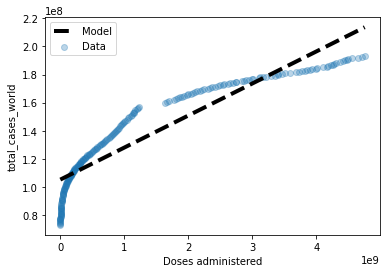

In [362]:
outcome, predictors = patsy.dmatrices('total_cases_world ~ doses_admin', vacc_cases_df)
model = sm.OLS(outcome, predictors)
## fit the model
results = model.fit()
print(results.summary())
plt.scatter(vacc_cases_df['doses_admin'], vacc_cases_df['total_cases_world'], alpha=0.3, label='Data')
m, b = np.polyfit(vacc_cases_df['doses_admin'],vacc_cases_df['total_cases_world'],1)
plt.plot(vacc_cases_df['doses_admin'],m*vacc_cases_df['doses_admin']+b,'--k', linewidth=4,label='Model')
plt.xlabel('Doses administered')
plt.ylabel('total_cases_world')
plt.legend();

In the plot, 'total_cases_world' and 'doses administered' are shown in the billions. 

It is important to note that 'total_cases_world' represents the total number of COVID cases that have occurred worldwide by each date, not the number of new cases for each date. Therefore, the total number of world cases always continues to rise regardless of a decrease in the rate of new cases. 

When looking at the plot, we can see that as the number of vaccine doses administered increases, the rate of increase for total world cases begins to fall. When there are fewer doses administered, the total number of cases rises rapidly, but as more are administered, the case numbers rise more slowly. This makes sense with what we know about how vaccines work. 

## Vaccine Doses Administered vs Athlete Counts

Next, we wanted to look at how the number of COVID-19 vaccine doses administered in each country a year before the 2020 Olympics, proportional to its population, compared to difference in number of athletes a country sent to the Olympics in 2020 and 2016. We wanted to see if a country's vaccinations had any relationship to how many athletes they were able to send to the Olympics.

                                OLS Regression Results                               
Dep. Variable:     change_athlete_count_prop   R-squared:                       0.009
Model:                                   OLS   Adj. R-squared:                  0.004
Method:                        Least Squares   F-statistic:                     1.763
Date:                       Wed, 08 Dec 2021   Prob (F-statistic):              0.186
Time:                               13:39:35   Log-Likelihood:                 1841.2
No. Observations:                        186   AIC:                            -3678.
Df Residuals:                            184   BIC:                            -3672.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

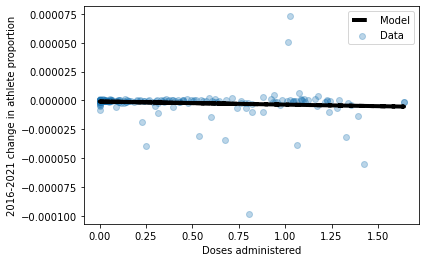

In [363]:
outcome2, predictors2 = patsy.dmatrices('change_athlete_count_prop ~ doses_admin_prop', prop_df)
model2 = sm.OLS(outcome2, predictors2)
## fit the model
results2 = model2.fit()
print(results2.summary())
plt.scatter(prop_df['doses_admin_prop'], prop_df['change_athlete_count_prop'], alpha=0.3, label='Data')
m2, b2 = np.polyfit(prop_df['doses_admin_prop'],prop_df['change_athlete_count_prop'],1)
plt.plot(prop_df['doses_admin_prop'],m2*prop_df['doses_admin_prop']+b2,'--k', linewidth=4,label='Model')
plt.xlabel('Doses administered')
plt.ylabel('2016-2021 change in athlete proportion')
plt.legend();

When looking at the plot, it seems that there isn't much difference between the number of athletes sent to the Olympics in 2016 and 2020 for most countries, but there are quite a few outliers in the plot. 

We can look at those outliers by selecting countries with an athlete count difference proportion less than -.000025 or greater than 0.000025. 

In [364]:
outliers_lo = prop_df[prop_df['change_athlete_count_prop'] < (-0.000025)]

outliers_lo

,nationality,2016_athlete_count_prop,2021_athlete_count_prop,doses_admin_prop,partial_vac_pop_prop,full_vac_pop_prop,cases_prop,total_vac_prop,change_athlete_count_prop
3,andorra,0.000065,0.000026,1.065896,0.627055,0.438841,0.176150,1.065896,-0.000039
5,antiguaandbarbuda,0.000095,0.000061,0.673436,0.379611,0.293825,0.012158,0.673436,-0.000034
11,bahamas,0.000079,0.000040,0.251221,0.152083,0.099139,0.034154,0.251221,-0.000039
58,fiji,0.000062,0.000031,0.534429,0.435585,0.087122,0.024159,0.522707,-0.000031
138,saintkittsandnevis,0.000136,0.000037,0.802549,0.439225,0.363324,0.010190,0.802549,-0.000098
142,sanmarino,0.000149,0.000117,1.327694,0.672805,0.672805,0.128969,1.345610,-0.000032
147,seychelles,0.000106,0.000050,1.422759,0.733153,0.689606,0.178756,1.422759,-0.000055


In [365]:
outliers_hi = prop_df[prop_df['change_athlete_count_prop'] > (0.000025)]
outliers_hi

,nationality,2016_athlete_count_prop,2021_athlete_count_prop,doses_admin_prop,partial_vac_pop_prop,full_vac_pop_prop,cases_prop,total_vac_prop,change_athlete_count_prop
97,liechtenstein,0.000080,0.000131,1.014559,0.538998,0.482696,0.080715,1.021695,0.000051
111,monaco,0.000079,0.000152,1.027619,0.551267,0.476352,0.066898,1.027619,0.000073


We can see that all of these outlier countries have very small populations, so the number of athletes they send to the Olympics on any given year compared to their population is going to be much more variable than countries with a large population. 

## Comparing Number of Athletes between 2016 to 2020

For the following analysis we first setup our data into a new dataframe to then be able to properly graph it. We sorted values from the number of athletes from greatest to least. The new dataframe, `ranked_ath_graph`, includes the number of athletes in 2016 and 2020 that were sent to the olympics proportional to the nations population. We generated three different line plots to display the top, middle, and lowest proportion of athletes.

In [366]:
#Set up dataframe to graph lineplots
#sort from greatest to least of 2016 athlete count:country
ranked_2016_ath=prop_df.sort_values(by='2016_athlete_count_prop',ascending=False,ignore_index=True)

#make a new graph with columns to graph
#set nationality as index
ranked_ath_graph=ranked_2016_ath.loc[:,['nationality','2016_athlete_count_prop','2021_athlete_count_prop']]
ranked_ath_graph=ranked_ath_graph.set_index('nationality')

#use original ranked_ath_graph to build new dataframe to graph
ranked_ath_graph = pd.DataFrame([ranked_ath_graph['2016_athlete_count_prop'],ranked_ath_graph['2021_athlete_count_prop']],
     index=['2016_olymp','2020_olymp'],
     columns=ranked_2016_ath['nationality'])
#displays final version of ranked_ath_graph
ranked_ath_graph

nationality,sanmarino,saintkittsandnevis,seychelles,antiguaandbarbuda,liechtenstein,bahamas,monaco,andorra,grenada,fiji,...,tanzania,philippines,yemen,indonesia,india,afghanistan,congodemrep,bangladesh,pakistan,kuwait
2016_olymp,0.000149,0.000136,0.000106,0.000095,0.000080,0.000079,0.000079,0.000065,0.000063,0.000062,...,1.319529e-07,1.254054e-07,1.104232e-07,1.070515e-07,9.286402e-08,8.478641e-08,5.076842e-08,4.431021e-08,3.437585e-08,0.000000
2020_olymp,0.000117,0.000037,0.000050,0.000061,0.000131,0.000040,0.000152,0.000026,0.000053,0.000031,...,3.257039e-08,1.620740e-07,9.839160e-08,9.402730e-08,8.393859e-08,1.255819e-07,7.587708e-08,3.606475e-08,4.440348e-08,0.000002


[Text(0.5, 1.0, 'Top Prop of Athlete to Country Pop')]

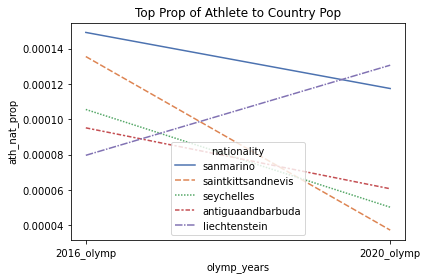

In [367]:
#The following three lineplots show changes from 2016 to 2020 olympic

#graph with the highest 5 proportions of athletes sent in 2016 
top_ath_prop=ranked_ath_graph.iloc[:,:5]
fig_top_ath=sns.lineplot(data=top_ath_prop, palette='deep')
#label graph
fig_top_ath.set_xlabel('olymp_years', fontsize=10)
fig_top_ath.set_ylabel('ath_nat_prop', fontsize=10)
fig_top_ath.set(title='Top Prop of Athlete to Country Pop')

The graph above is visualizing the top 5 proportions of athletes and how it changed from 2016 to 2020. As we see there was an increase in proportion of athletes from 2016 to 2020 except for Liechtenstein.

[Text(0.5, 1.0, 'Mid Prop of Athlete to Country Pop')]

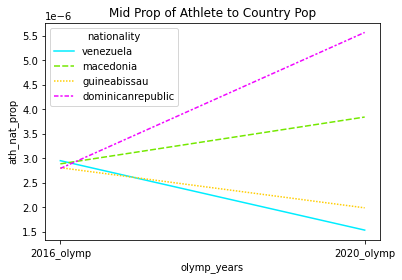

In [368]:
#graph with sample of 5 nationalities from middle of ranked_ath_graph
#NOTE: the following proportions are e-06
mid_ath_prop=ranked_ath_graph.iloc[:,91:95]
fig_mid_ath=sns.lineplot(data=mid_ath_prop, palette='gist_ncar')
#label graph
fig_mid_ath.set_xlabel('olymp_years', fontsize=10)
fig_mid_ath.set_ylabel('ath_nat_prop', fontsize=10)
fig_mid_ath.set(title='Mid Prop of Athlete to Country Pop')

The line plot above displays the 5 nationalities from the middle portion of the new dataframe, ranked_ath_graph. We can see an increase of proportion of athletes for both Macedonia and the Dominican Republic. However, there was a decrease in the proportion of athletes for Venezuela and Guinea Bissau.

[Text(0.5, 1.0, 'Low Prop of Athlete to Country Pop')]

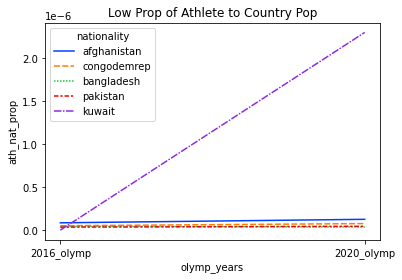

In [369]:
#graph displaying the lowest 5 proportions of athletes sent
#NOTE: the following proportions are e-06
low_ath_prop=ranked_ath_graph.iloc[:,181:]
fig_low_ath=sns.lineplot(data=low_ath_prop, palette='bright')
#label graph
fig_low_ath.set_xlabel('olymp_years', fontsize=10)
fig_low_ath.set_ylabel('ath_nat_prop', fontsize=10)
fig_low_ath.set(title='Low Prop of Athlete to Country Pop')

The final line plot displayed above shows that while there was an increase in the proportion of athletes from 2016 to 2020 there was no visible change for the rest of the nationalities.

## Comparing Relationship of COVID-19 Cases and Vaccinations and Proportion of Athletes in 2021

For the following analysis we set up another dataframe to include the proportions of COVID-19 cases, vaccinations, and the 2021 olympic athletes accroding to their country's population. This dataframe was then put into a scatter matrix.

In [370]:
#Set up dataframe to graph in scatterplot matrix
scatter_df=prop_df.loc[:,['2021_athlete_count_prop','cases_prop','full_vac_pop_prop']]
#displays scatter_df
scatter_df

,2021_athlete_count_prop,cases_prop,full_vac_pop_prop
0,1.255819e-07,0.002703,0.005504
1,2.828700e-06,0.045425,0.171594
2,9.177196e-07,0.003015,0.000000
3,2.588729e-05,0.176150,0.438841
4,5.904544e-07,0.001205,0.018722
...,...,...,...
181,1.730049e-07,0.000881,0.003599
182,9.839160e-08,0.000176,0.000000
183,1.535278e-06,0.009902,0.004013
184,3.317613e-07,0.006214,0.044097


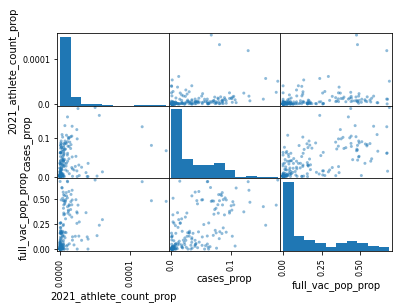

In [371]:
#graphs scatterplot visualizing relationship of 
#covid_cases:2021 pop & full_vacc:2021_pop & 2021 athlete:2021 pop
scatter_fig=pd.plotting.scatter_matrix(scatter_df)

From the scatter matrix above we can see that there does not seem to be a strong correlation between the proportion of athletes sent to the olympics in 2021 with the number of COVID-19 cases and vaccinations. 

# Ethics & Privacy

The dataset for the 2016 and 2021 Olympics contain personally identifiable information such as the athletes' names. However, that information is public and freely available for anyone to look up. Furthermore, after cleaning up the data all personally identifiable information is stripped and dropped from the dataframes so that it can not be traced back to a particular person as only the aggregated calculations are kept for each country. 
    Another major ethical concern would be that the dataset source for data on vaccination and Covid cases are self-reported by government agencies, so there is potential bias for underreporting the number of Covid cases and/or overreporting the number of vaccinations. For some of these countries there isn't an independent audit to verify the numbers especially in countries where corruption and authoritism is rampant. This could portray those countries who publish misleading data as better performing than countries that more accurately count cases and vaccinations. 
    Lastly, when cleaning our data, we came across some countries that have changed leadership and their official name in the five years between the 2016 and 2020 Olympics. By trying to consisently compare the country names between both Olympics, there might be some concerns of inaccurate naming or regional disputes in regards to territorial claims that might affect the names of the countries in this data, which may be a source of bias in this report. 

# Conclusion & Discussion

Discuss your project. Summarize your data and question. Briefly describe your analysis. Summarize your results and conclusions. Be sure to mention any limitations of your project. Discuss the impact of this work on society. (~2-3 paragraphs)


In this report, we wanted to assess how the number of COVID-19 cases and vaccinations were related to the number of athletes each country was able to send to the 2020 Olympics compared to the 2016 Olympics. We hypothesized that countries that had higher case numbers and fewer vaccinations in proportion to their population would see a decrease in the number of athletes they sent to the Olympics in 2020 compared to 2016. For our analysis, we used 2 datasets that contained information on the athletes and the countries they were from for the 2016 and 2020 Olympics. We also had dataset with a time series of the number of Covid cases in each country, a dataset with the number of Covid vaccines administered each day for each country, and a dataset on population by country. 

For our analysis, we created three visualizations. The first was a linear regression comparing the worldwide number of vaccination and the number of global all-time cases. We found that as the number of vaccinations increased, the rate of global infections decreased, which is consistent with evidence we have already seen. Our second visualization was a comparison of the change in the number of athletes coutries sent to the Olympics in 2016 and 2020. These differences were plotted in a line graph for the 5 countries with the highest proportion of athletes to their population, 5 countries in the middle, and the 5 countries with the lowest proportion of athletes to their population. In this visualization, we didn't see a consistent pattern of change. Lastly, we set up a scatter matrix of Covid cases, Covid vaccinations, and number of athletes proportional to population for each country. In the end, we did not find a correlation between the number of Covid cases or vaccinations with a change in the number of athletes countries were able to send to the Olympics. 

One of the limitations we found in this project was that many countries we included in our data analysis have very small populations, so even if they sent only 1 or 2 athletes to the Olympics, the proportion of their population that went to the Olympics was very high compared to others, creating outliers. This means that the proportion of their population that goes to the Olympics is much more prone to fluctuation between years, because just one more Olympic makes a much larger difference. Additionally, there were some countries that changed their official name between the 2016 and 2020 Olympics which were difficult to include in this analysis. 

It is worth noting that the overall number of athletes attending the 2020 Olympics was higher than the number of athletes attending in 2016, which is surprising. It is possible that many athletes took greater precautions or had easier access to vaccines, which allowed more of them compete. However, we are not entirely sure why Covid didn't cause a decrease in the number of athletes at the 2020 Olympics. 

The Olympics is a space where athletes from around the world come together physically and there is an intersection of many people with governments who handled the pandemic differently and with access to different health care systems. It is important to analyze the way cases and vaccines are distributed around the world. As we approach the 2022 Winter Olympics, we will again have another opportunity to see how Covid affects the games in a different stage of the pandemic. 






# Team Contributions

- Genevieve Cassidy: Overview, Background & Prior Work, Dataset Descriptions, wrote some explanation of data cleaning and some of the EDA analysis, Conclusion & Discussion

- Jenny Vu: Wrote portion of code for data set-up, some dataframes, and graphs for Data Analysis

- Jessica Gazca: Wrote some explanations for data cleaning and EDA analysis, Presentation Slides

- Rich Liu: Wrote code for some of the data cleaning, regression testing and graphs, wrote some ethics & privacy. 